# CNN 复习

In [212]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.10.0


## 数据获取

In [253]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, test_images.shape, type(test_images))

(60000, 28, 28) (10000, 28, 28) <class 'numpy.ndarray'>


## 数据展示

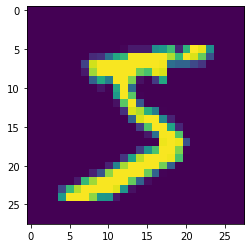

In [254]:
plt.imshow(train_images[0])

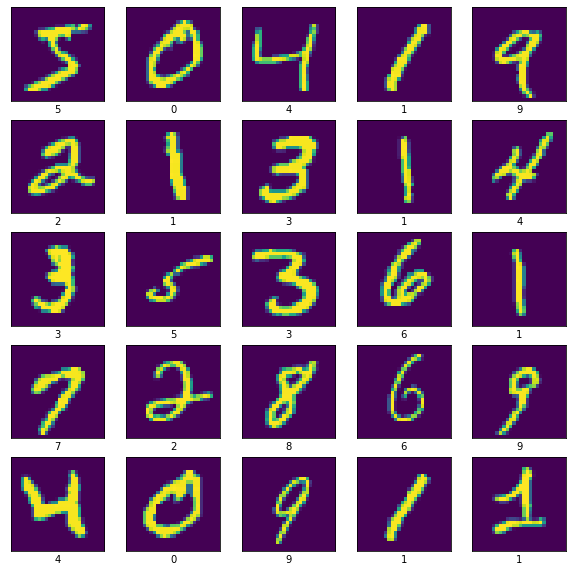

In [255]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])

## 定义模型

In [256]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape = (28, 28, 1), filters=4, kernel_size=(4,4),
                           strides=1, padding="valid", name='conv2d_1'),
    tf.keras.layers.Conv2D(filters=2, kernel_size=(2,2),
                           strides=1, padding="same", name='conv2d_2'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),
                           strides=2, name="max_pool"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 4)         68        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 2)         34        
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 12, 12, 2)         0         
_________________________________________________________________
flatten_41 (Flatten)         (None, 288)               0         
_________________________________________________________________
dropout_59 (Dropout)         (None, 288)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 128)               36992     
_________________________________________________________________
dropout_60 (Dropout)         (None, 128)               0         
__________

In [257]:
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.0001), #定义优化器， 学习率为0.0001
              loss='sparse_categorical_crossentropy', #定义损失函数
              metrics=['accuracy'])

In [258]:
#图片归一化
train_images = train_images / 255.
test_images = test_images / 255.

#模型输入数据需4维的[batch, height, width, channels]，原始的train_images的np数组是3维[batch, height, width]
history = model.fit(train_images[:, :, :, np.newaxis], train_labels, epochs=6)

Epoch 1/6
60000/60000 [==============================] - 7s 112us/step - loss: 1.3683 - acc: 0.5407
Epoch 2/6
60000/60000 [==============================] - 5s 90us/step - loss: 0.7594 - acc: 0.7565
Epoch 3/6
60000/60000 [==============================] - 5s 90us/step - loss: 0.6365 - acc: 0.7977
Epoch 4/6
60000/60000 [==============================] - 5s 90us/step - loss: 0.5664 - acc: 0.8216
Epoch 5/6
60000/60000 [==============================] - 5s 90us/step - loss: 0.5268 - acc: 0.8360
Epoch 6/6
60000/60000 [==============================] - 5s 89us/step - loss: 0.4918 - acc: 0.8465


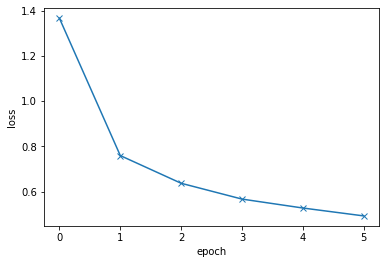

In [259]:
plt.plot(history.history['loss'], '-x')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

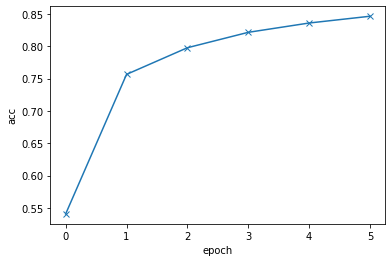

In [260]:
plt.plot(history.history['acc'], '-x')
plt.xlabel("epoch")
plt.ylabel("acc")
plt.show()

## 测试模型

In [261]:
test_loss, test_acc = model.evaluate(test_images[:, :, :, np.newaxis], test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 92us/step
Test accuracy: 0.935


In [238]:
predictions = model.predict(test_images[0][np.newaxis,:, :, np.newaxis])
print(test_labels[0], np.argmax(predictions[0]))

7 7
